# Dataframe and Plots


## Pandas: efficiently working with tables

Dataframes are tables where each column is homogeneous (same type), whereas a matrix has only numeric values. 
In simple words, dataframes are similar to a (well formatted) Excel table.

Pandas is a powerful library to manage Data Frames in Python. A key feature is the ability to operate on the whole table with a single operation (without using loops).

First, let's import the library:

In [42]:
import pandas as pd

## A first dataframe

Dataframes can be created from code, but usually they are imported from a file.

In [43]:
# create a df from dictionary
data = {
    'name': ['John', 'Anna', 'Peter', 'Linda'],
    'location': ['New York', 'Paris', 'Berlin', 'London'],
    'age': [24, 13, 53, 33]
}
df = pd.DataFrame(data)

# now we can look at the data
df

,name,location,age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


## Importing from a CSV file

Let's try to import the dataframe from `tips.csv`

In [44]:
tips_df = pd.read_csv('tips.csv')

Now let's explore a bit the dataframe:

In [45]:
# What colummns do we have?
tips_df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

A useful function is **head()**, to just see the first rows (similarily, there is a **tail()** function):

In [51]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The `info()` method will print the format of each column:

In [52]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


For the column *sex* we want to see how many values we have (useful for data cleaning when for example both *Male* and *male* exists):

In [54]:
tips_df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

### A more complex example: grouping

How many smokers are men? We need to master a bit of Pandas for this but let's see this example:

- Grouping the DataFrame `df.groupby(['sex', 'smoker'])`: This method groups the DataFrame by the columns sex and smoker. This means it creates groups of data where each group corresponds to a unique combination of *sex* and *smoker*
- We apply `size()` to the result: After grouping, this method counts the number of rows in each group. Essentially, it returns the size of each group, i.e., the number of occurrences of each combination of *sex* and *smoker*.

In [47]:
print(tips_df.groupby(['sex', 'smoker']).size())

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
dtype: int64


- Finally we `reset_index(name='count')`: The result of groupby and size is a Series with a multi-index (based on *sex* and *smoker*). `reset_index()` is used to convert this Series into a DataFrame with the multi-index as columns. `name='count'`:  renames the column containing the sizes of the groups to count.

In [48]:
# Load the tips dataset
smoker_counts = tips_df.groupby(['sex', 'smoker']).size().reset_index(name='count')
smoker_counts

,sex,smoker,count
0,Female,No,54
1,Female,Yes,33
2,Male,No,97
3,Male,Yes,60


Let see an example of filtering:

In [66]:
filtered_df = tips_df[tips_df['total_bill'] > 45]
print(f"{filtered_df.size} rows out of {tips_df.size} have a total bill greater than 45: {filtered_df.size/tips_df.size*100:.2f}%")

35 rows out of 1708 have a total bill greater than 45: 2.05%


# Plotting with Seaborn

Seaborn works well with Pandas dataframes as a source of data.

<Axes: xlabel='total_bill', ylabel='tip'>

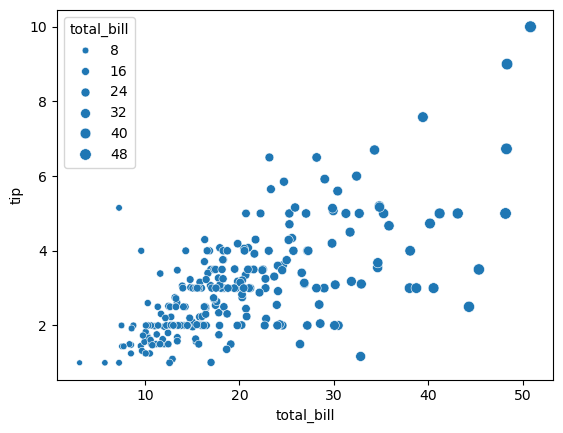

In [ ]:
import seaborn as sns


# Create a scatter plot with Seaborn
scatter_plot = sns.scatterplot(data=tips_df, x='total_bill', y='tip', size='total_bill')

# Show the plot
scatter_plot


<Axes: xlabel='total_bill', ylabel='tip'>

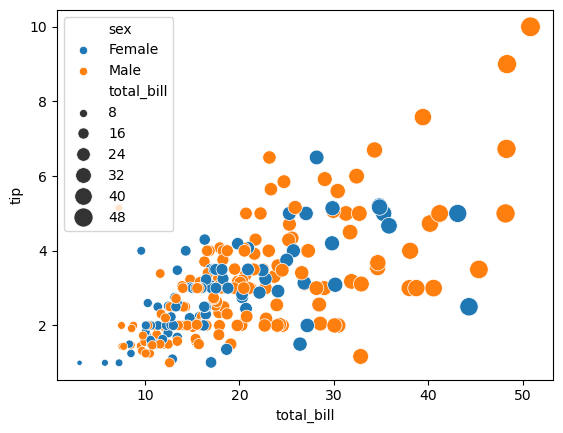

In [ ]:
# Here we map two extra columns to the size and colour of the points
scatter_plot = sns.scatterplot(data=tips_df, x='total_bill', y='tip', size='total_bill', sizes=(15, 200), hue='sex')

# Show the plot
scatter_plot